In [16]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [17]:
import numpy as np
# наборы данных для экспериментов
from tensorflow.keras.datasets import cifar10, fashion_mnist
# последовательная модель (стек слоев)
from tensorflow.keras.models import Sequential
# полносвязный слой и слой выпрямляющий матрицу в вектор
from tensorflow.keras.layers import Dense, Flatten
# слой выключения нейронов и слой нормализации выходных данных (нормализует данные в пределах текущей выборки)
from tensorflow.keras.layers import Dropout, BatchNormalization, SpatialDropout2D, GaussianDropout
# слои свертки и подвыборки
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
# работа с обратной связью от обучающейся нейронной сети
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# вспомогательные ubuntu
\



from tensorflow.keras import utils
# работа с изображениями
from tensorflow.keras.preprocessing import image
%matplotlib inline 

In [18]:
# Размер мини-выборки
"""может повлиять на изменение качества обучения и скорость обучения"""
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
"""можно не менять, если будете использовать callbacks"""
nb_epoch = 40
# Размер изображений
"""настроить под ваши изображения"""
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3

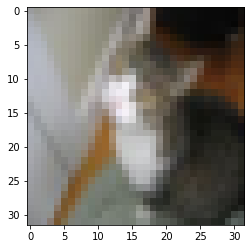

Номер класса: [3]
Тип объекта: кот


In [19]:
n = 101
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [20]:
X_train.shape


(50000, 32, 32, 3)

In [21]:
# добавляем цветовой канал
X_train = X_train.reshape((50000, 32, 32, 3))
X_train = X_train.astype('float32')
X_test = X_test.reshape((10000, 32, 32, 3))
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [23]:
%%time
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
"""можно менять:
- количество сверточных слоев в блоке (блок - это свертка или несколько сверток, которые завершаются пулингом)
- количество сверточных блоков
- количество ядер свертки (filters)
- размер ядра свертки (kernel_size)
- MaxPooling2D на AveragePooling2D
- добавлять/убирать BatchNormalization. Его можно ставить после каждого слоя свертки, а можно в конце блока. Экспериментируйте
- добавлять/убирать Dropout. Его можно ставить после каждого блока свертки, а можно еще и после Dense слоя. Экспериментируйте
- менять в Dropout процент выключаемых нейронов
- менять Dropout на SpatialDropout2D, GaussianDropout
- менять количество слоев Dense
- менять количество нейронов в слое Dense"""
# padding='same' - не будет меняться размер картинки. padding='valid'
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                        input_shape=(img_rows, img_cols, img_channels), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# # Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# # Первый слой нормализации данных
model.add(BatchNormalization())
# # Первый Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# # Второй слой нормализации данных
model.add(BatchNormalization())
#  # Второй Слой регуляризации Dropout
model.add(Dropout(0.25))

# # Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# # Шестой сверточный слой
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# # Третий слой подвыборки
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # Третий слой нормализации данных
# model.add(BatchNormalization())
# # Третий Слой регуляризации Dropout
# model.add(Dropout(0.25))


# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# # Четвертый слой нормализации данных
# model.add(BatchNormalization()) 
# # Четвертый Слой регуляризации Dropout
model.add(Dropout(0.75))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

CPU times: user 138 ms, sys: 10.2 ms, total: 149 ms
Wall time: 109 ms


In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [25]:
# EarlyStopping - если patience эпох качество не растет или потери не убывают, то происходит останов обучения
# ModelCheckpoint - сохраняет в указанную директорию веса лучшей модели и в конце обучения возвращает их.
# ReduceLROnPlateau - уменьшает шаг обучения в factor раз после patience эпох без улучшения качества обучения
"""patience у ReduceLROnPlateau меньше, чем  patience у EarlyStopping
иначе не произойдет ни одного уменьшения шага обучения
можно следить за monitor=val_loss, а можно monitor=val_accuracy
меняйте factor в ReduceLROnPlateau - он значим"""
callbacks_list = [EarlyStopping(monitor='val_loss', patience=5),
                  ModelCheckpoint(filepath='my_model.h5',
                                  monitor='val_loss',
                                  save_best_only=True),
                  ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
                  ] 
# экспериментируйте с optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [26]:
scores = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 7s 21ms/step - loss: 2.3029 - accuracy: 0.0919


# Method-2

In [27]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
#from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline


In [28]:
batch_size = 32  # The default batch size of keras.
num_classes = 3  # Number of class for the dataset which are using

In [29]:
# download cifar10 dataset from keras
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


### Make a new dataset for automobile dog and horse

In [30]:
index = np.where((y_train == 1) | (y_train == 5) | (y_train == 7))
x_train = x_train[index[0]]
y_train = y_train[index[0]]

In [31]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
#print(x_train.shape[0], 'train samples')

x_train shape: (15000, 32, 32, 3)
y_train shape: (15000, 1)


In [32]:
index = np.where((y_test == 1) | (y_test == 5) | (y_test == 7))
x_test = x_test[index[0]]
y_test = y_test[index[0]]

In [33]:
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (3000, 32, 32, 3)
y_test shape: (3000, 1)


### Re-labeling data

In [34]:
for n, i in enumerate(y_train):
    if i == 1:
        y_train[n] = 0
    elif i==5:
        y_train[n]= 1
    else:
        y_train[n]= 2

In [35]:
for n, i in enumerate(y_test):
    if i == 1:
        y_test[n] = 0
    elif i==5:
        y_test[n]= 1
    else:
        y_test[n]= 2

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


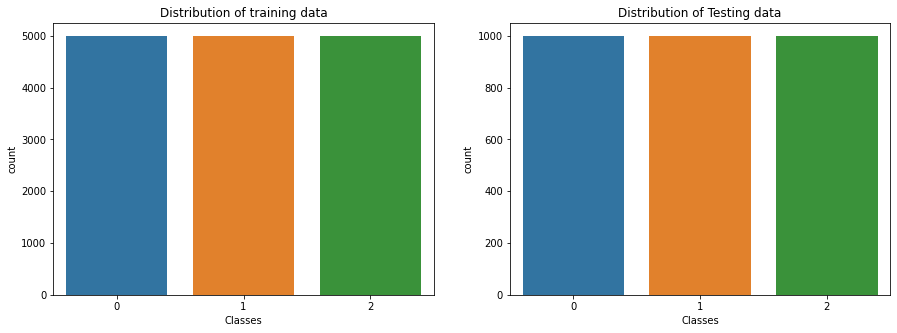

In [36]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [37]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [38]:
#define the convnet
model = Sequential()
# CONV2D => CONV2D => BATCHNORMALIZATION => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV2D => CONV2D => BATCHNORMALIZATION => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV2D => CONV2D => BATCHNORMALIZATION => POOL => DROPOUT
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes,activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)       

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [40]:
history = None  # For recording the history of trainning process.
data_augmentation = True

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.,
        fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        validation_split=0.0)

    datagen.fit(x_train)
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=40,
                                    validation_data=(x_test, y_test),
                                    workers=4)



Using real-time data augmentation.
Epoch 1/40


/home/hemanth/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


469/469 [==============================] - 42s 89ms/step - loss: 1.0480 - accuracy: 0.6205 - val_loss: 0.4870 - val_accuracy: 0.7883
Epoch 2/40
469/469 [==============================] - 43s 91ms/step - loss: 0.5206 - accuracy: 0.7779 - val_loss: 0.3725 - val_accuracy: 0.8350
Epoch 3/40
469/469 [==============================] - 43s 91ms/step - loss: 0.4401 - accuracy: 0.8290 - val_loss: 0.5170 - val_accuracy: 0.7930
Epoch 4/40
469/469 [==============================] - 44s 93ms/step - loss: 0.4017 - accuracy: 0.8431 - val_loss: 0.3230 - val_accuracy: 0.8693
Epoch 5/40
469/469 [==============================] - 42s 89ms/step - loss: 0.3650 - accuracy: 0.8542 - val_loss: 0.2920 - val_accuracy: 0.8820
Epoch 6/40
469/469 [==============================] - 45s 96ms/step - loss: 0.3250 - accuracy: 0.8731 - val_loss: 0.2688 - val_accuracy: 0.8960
Epoch 7/40
469/469 [==============================] - 44s 94ms/step - loss: 0.3106 - accuracy: 0.8809 - val_loss: 0.3395 - val_accuracy: 0.8600
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


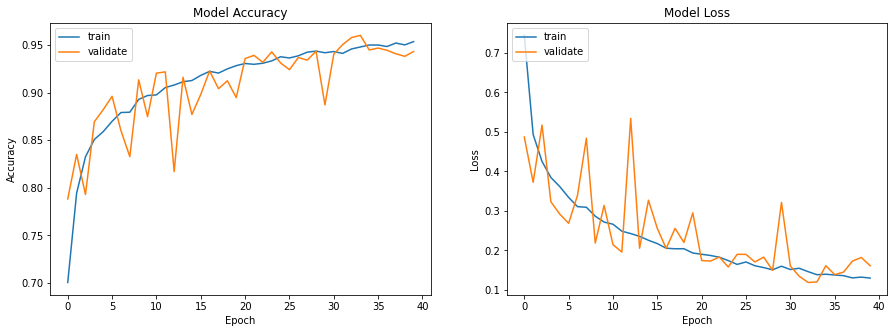

In [41]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [42]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)


94/94 [==============================] - 2s 22ms/step - loss: 0.1614 - accuracy: 0.9430
Test loss: 0.1613735556602478
Test accuracy: 0.9430000185966492


In [43]:
labels = ['Automobile', 'Dog', 'Horse']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

In [44]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1000
           1       0.96      0.88      0.92      1000
           2       0.90      0.96      0.93      1000

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



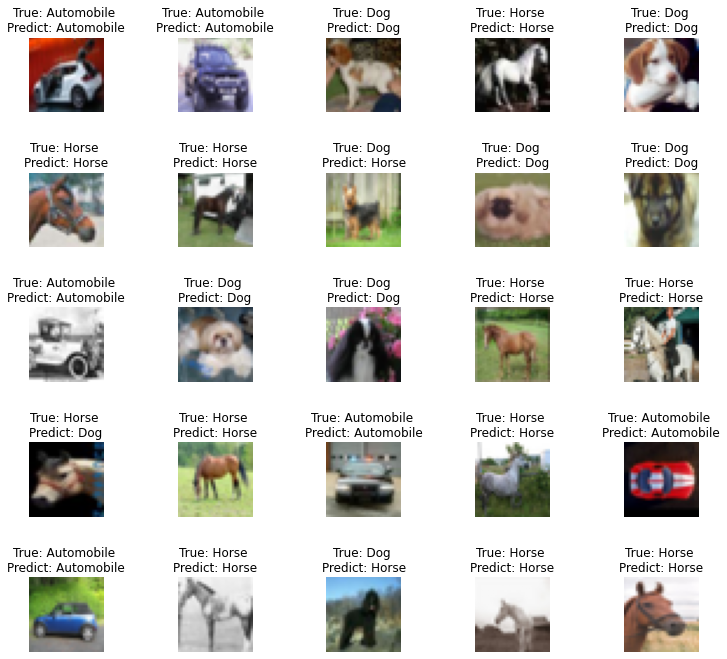

In [45]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [46]:
def show_similar(number,dict_key):
    for i in range(300): #Only taking few samples from test dataset because its taking to long to find all similar images from 3000 images of test dataset
        test_image = np.expand_dims(x_test[i], axis=0)
        test_result = model.predict_classes(test_image)
        #plt.imshow(x_test[number])
        dict_key_get = test_result[0]
        if dict_key==Y_true[i]:
            plt.figure(figsize=(3, 3))
            plt.imshow(x_test[i])
            plt.title("Similar images \nPredicted: {} \nTrue Label: {}".format(labels[dict_key_get],labels[Y_true[i]]))
plt.show()


In [47]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Orignal images \nPredicted: {} \nTrue Label: {}".format(labels[dict_key],labels[Y_true[number]]))
    #print(dict_key)
    #show_similar(number,Y_true[number])

/home/hemanth/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


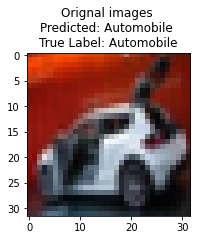

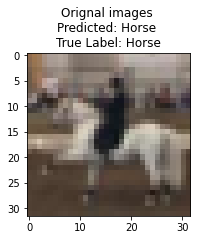

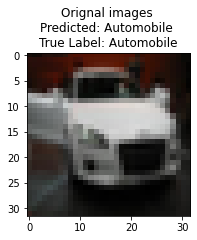

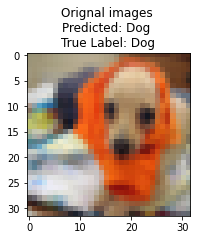

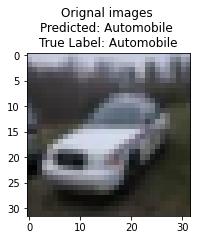

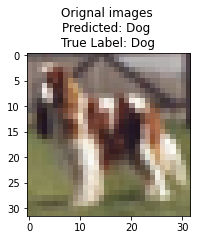

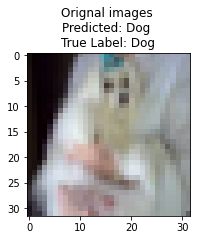

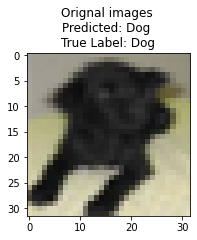

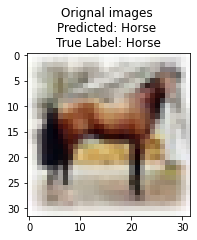

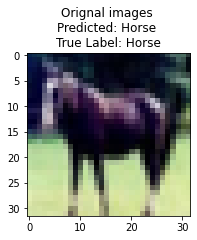

In [48]:
for i in range(10):
    show_test(100*i) #similar images are showing according to its true label #25=dog,1000=horse, 2000=automobile



# Method-3

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
%matplotlibinline


UsageError: Line magic function `%matplotlibinline` not found.


In [50]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


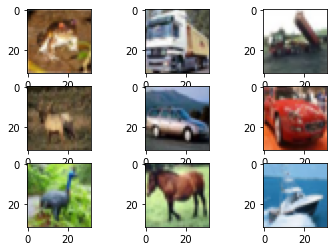

In [52]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [53]:
batch_size = 32  
classes = 10
epochs = 20


In [54]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [56]:
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)       

In [57]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Let's train the model using RMSprop
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [58]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.001)


In [59]:
datagen=ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images,
        vertical_flip=False)
datagen.fit(x_train)


In [60]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=32),
                              epochs =5, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/5
1562/1562 - 272s - loss: 1.7359 - accuracy: 0.3687 - val_loss: 1.3706 - val_accuracy: 0.5009
Epoch 2/5
1562/1562 - 264s - loss: 1.4772 - accuracy: 0.4721 - val_loss: 1.2713 - val_accuracy: 0.5511
Epoch 3/5
1562/1562 - 263s - loss: 1.4053 - accuracy: 0.5026 - val_loss: 1.1984 - val_accuracy: 0.5819
Epoch 4/5
1562/1562 - 262s - loss: 1.3836 - accuracy: 0.5142 - val_loss: 1.2437 - val_accuracy: 0.5729
Epoch 5/5
1562/1562 - 265s - loss: 1.3883 - accuracy: 0.5169 - val_loss: 1.2078 - val_accuracy: 0.5759


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


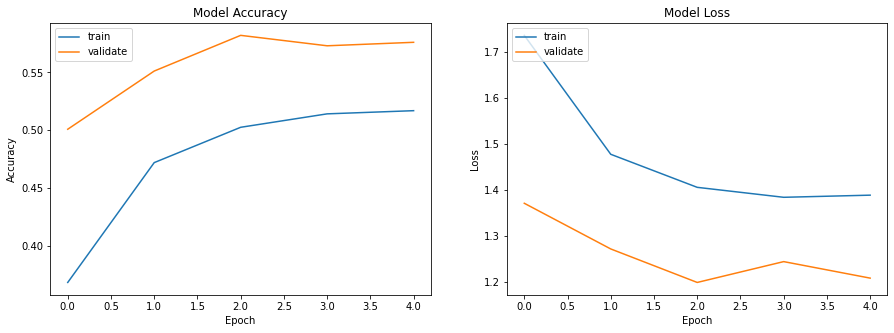

In [61]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [62]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 10s 33ms/step - loss: 1.2078 - accuracy: 0.5759
Test loss: 1.2077903747558594
Test accuracy: 0.5759000182151794


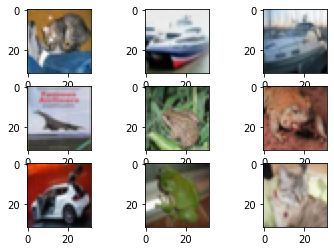

In [63]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i])
plt.show()


### Method-4

In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [79]:
# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image


In [80]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [81]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [82]:
# Now for a single image 
print(X_train[0].shape)

(32, 32, 3)


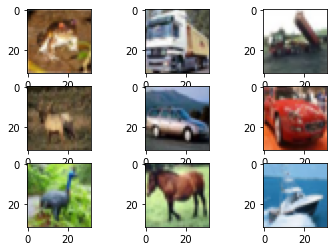

In [83]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
# show the plot
plt.show()


In [84]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [85]:
# class labels shape
print(y_train.shape)
print(y_train[0])



(50000, 1)
[6]


In [86]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [87]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [89]:
# define hyper parameters

learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
#weights = '/home/hemanth/Desktop/all_cnn_weights_0.9088_0.4994.hdf5'
#model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)       

In [90]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 91ms/step


In [91]:
# print our predictions
print (predictions)

[[2.0147110e-03 2.7391771e-04 9.6345738e-02 1.3270701e-01 3.3905405e-01
  1.8196622e-01 7.9902619e-02 1.6485116e-01 1.8906740e-03 9.9393690e-04]
 [3.8078728e-03 1.1807067e-03 6.7424729e-02 2.4906942e-01 6.7562021e-02
  3.1918782e-01 2.0341988e-01 8.1076831e-02 1.6988950e-03 5.5719023e-03]
 [9.1402256e-04 2.0260599e-03 6.1170857e-02 3.8541034e-01 4.8628235e-03
  4.4695634e-01 8.0917433e-02 1.2424136e-02 8.0548599e-04 4.5125214e-03]
 [3.5335770e-04 6.3417836e-05 4.1762911e-02 3.9817113e-01 3.1126734e-02
  2.6165599e-01 2.5275362e-01 1.3404746e-02 1.1204385e-04 5.9604069e-04]
 [3.0659506e-04 7.3980623e-01 4.0792063e-08 1.2105150e-07 3.4941717e-08
  3.6584257e-08 5.3337685e-09 3.1235854e-06 6.4827422e-05 2.5981903e-01]
 [2.7515213e-07 9.6378398e-01 1.1927084e-13 6.6771827e-13 7.2180819e-15
  1.4115589e-14 1.2871335e-13 1.0275203e-13 2.7497046e-08 3.6215767e-02]
 [6.7156563e-03 5.1110949e-02 6.4960301e-02 4.1717035e-01 8.0597093e-03
  7.7257343e-02 3.2158771e-01 2.2320959e-03 3.5954051e-02 

In [92]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
1.0
1.0
1.0000001
1.0
1.0
1.0000001
0.9999999


In [93]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print (class_result)


[4 5 5 3 1 1 3 6 1]


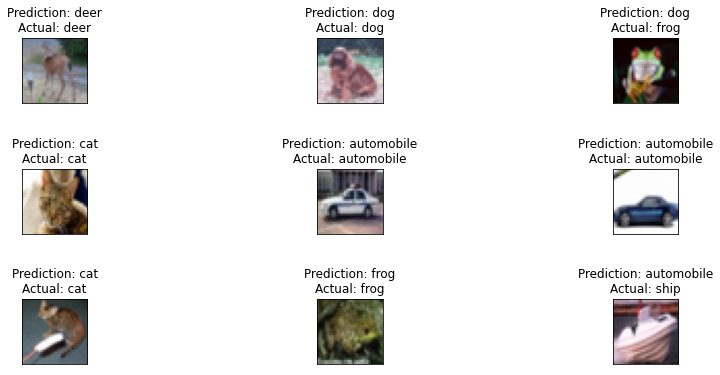

In [94]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()

In [95]:
y_pred=model.predict(X_test, verbose = 1)
class_result_y_pred = np.argmax(y_pred,axis=-1)

313/313 [==============================] - 10s 33ms/step


In [96]:
class_result_y_pred


array([3, 1, 8, ..., 5, 4, 7])

In [97]:
i2c = np.load("../input/inc2int-to-category/datasets_704654_1230900_int2categroy.npy")
i2c


FileNotFoundError: [Errno 2] No such file or directory: '../input/inc2int-to-category/datasets_704654_1230900_int2categroy.npy'

In [98]:
class_result_y_pred = [i2c[i] for i in class_result_y_pred]


NameError: name 'i2c' is not defined

In [99]:
class_result_y_pred


array([3, 1, 8, ..., 5, 4, 7])

In [100]:
idx=np.arange(1,10000+1)
answers = pd.DataFrame({"id":idx,"label":class_result_y_pred})
answers

,id,label
0,1,3
1,2,1
2,3,8
3,4,0
4,5,6
...,...,...
9995,9996,3
9996,9997,5
9997,9998,5
9998,9999,4


In [101]:
answers.to_csv("answers.csv",index=0)

### Method-5 Data Augmentation with keras using Cifar-10

In [102]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
import numpy as np

In [103]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [104]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [105]:
X_train/=255
X_test/=255


## Original Images

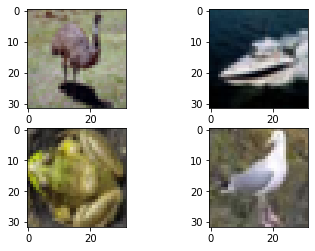

In [106]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

## Rotating Images

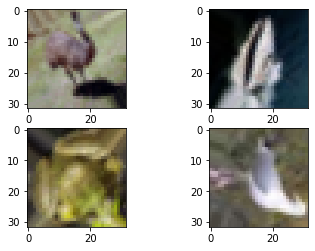

In [107]:
datagen = ImageDataGenerator(rotation_range=359)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

## Vertical Scroll

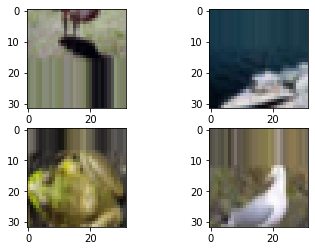

In [108]:
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break


## Symmerty in Horizontal

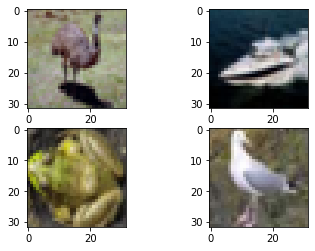

In [109]:
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break


## Featurewise Center

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


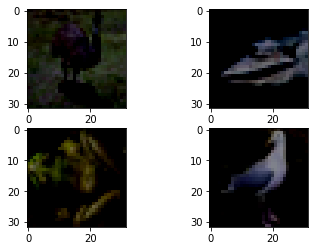

In [110]:
datagen = ImageDataGenerator(featurewise_center=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break



### Samplewise Center

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


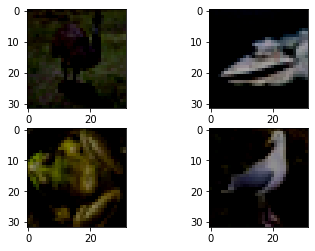

In [111]:
datagen = ImageDataGenerator(samplewise_center=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

## Featurewise std_normalization

/home/hemanth/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


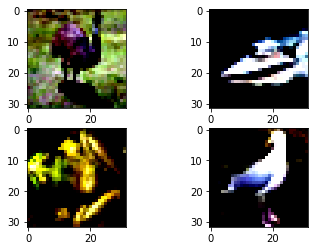

In [112]:
datagen = ImageDataGenerator(featurewise_std_normalization=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break


## Samplewise std_normalization

/home/hemanth/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


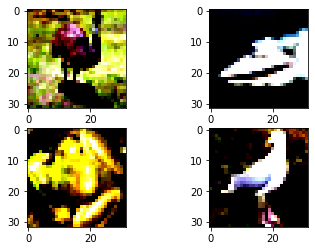

In [113]:
datagen = ImageDataGenerator(samplewise_std_normalization=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

## Zca Whitening

/home/hemanth/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


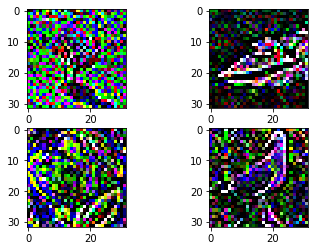

In [114]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break


## Zoom Range

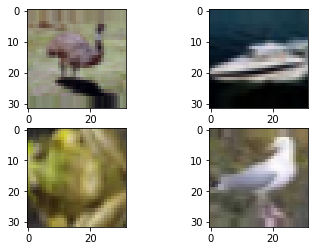

In [115]:
datagen = ImageDataGenerator(zoom_range=0.3)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break